# What is a moving average?

- A moving average is one of the most basic technical indicators used to analyze stocks. 

- **Moving average is a broad term and there are many variations used by analysts to smooth out price data and analyze trends.**

- Moving averages will require a time period for calculations.

- For example, an investor may choose a 50-day moving average, where the past 50 days in the data will be used to calculate the average. 

- Smaller windows of time are more sensitive to changes in the price data due to the fewer number of data points and larger time periods are less sensitive to daily changes.

# How are moving averages used?

- Moving averages may be used by traders as their main strategy or as a part of their trading strategy. 

- The most popular and simple way to use moving averages is to use a cross over strategy which, if followed, will hopefully tell a trader when to buy and sell.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
spy_ticker = yf.Ticker('SPY')
spy = yf.download('SPY')

[*********************100%***********************]  1 of 1 completed


In [5]:
spy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.547977,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.729681,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.784199,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,26.056753,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,26.165789,531500
...,...,...,...,...,...,...
2022-06-01,415.170013,416.239990,406.929993,409.589996,409.589996,86585800
2022-06-02,409.420013,417.440002,407.040009,417.390015,417.390015,79609600
2022-06-03,412.399994,414.040009,409.510010,410.540009,410.540009,71830800


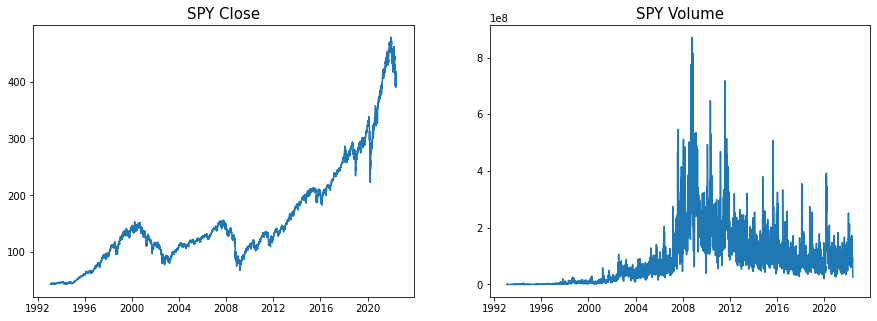

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(15,5))
ax[0].set_title('SPY Close', fontsize=15)
ax[0].plot(spy['Close'])
ax[1].set_title('SPY Volume', fontsize=15)
ax[1].plot(spy['Volume'])

# Crossover Strategy

#### **Bullish** : 

crossover occurs when the short-term SMA crosses above the long-term SMA.

#### **Bearish** :

crossover occurs when the short-term SMA crosses below the long-term SMA.

### Example

Imagine we have two SMA lines: a 50 day (short-term) and a 100 day (long-term). 

The moving averages will be calculated and plotted over the price data.

When the 50 day moving average crosses above the 100 day moving average, this would be a buy signal. 

If the 50 day were to then cross below the 100 day, it would be a sell signal.

The hope of this is to buy low and sell high.

# Simple Moving Averages

𝑃𝑛 = The price of an asset at period 𝑛

𝑛 = The number of total periods

<img src="https://miro.medium.com/max/264/1*zI1hZGapyV_U8Id3ANuy2g.png">

- **.rolling()** will take care of the moving window calculations. It takes the window size (e.g. 10, 20, etc) and performs calculations on only the data points within that window.

- **.mean()** will calculate the mean, or average, across the data points within the window provided in the .rolling() function. For example, if the window size is set to 10 data points, the average of those 10 data points will be calculated.

We will calculate various window sizes to later test which combinations work best. 

Here, we will calculate windows of sizes 10, 20, 50 and 100.

In [7]:
SMA10 = spy['Close'].rolling(window = 10).mean()
SMA20 = spy['Close'].rolling(window = 20).mean()
SMA50 = spy['Close'].rolling(window = 50).mean()
SMA100 = spy['Close'].rolling(window = 100).mean()

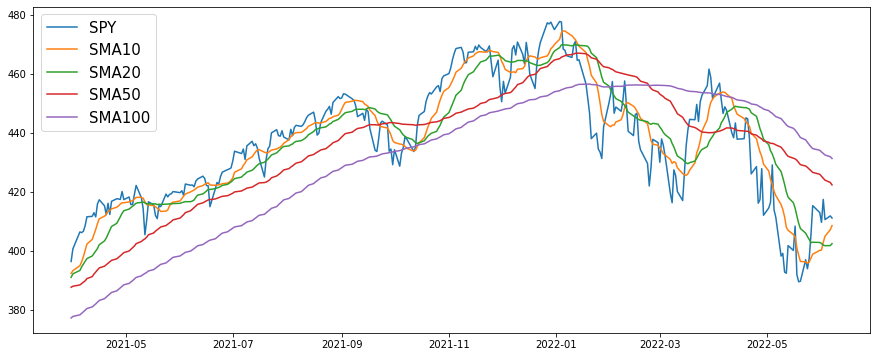

In [8]:
# taking last 300 trading days
plt.figure(figsize=(15, 6))
plt.plot(spy['Close'][-300:], label='SPY')
plt.plot(SMA10[-300:], label='SMA10')
plt.plot(SMA20[-300:], label='SMA20')
plt.plot(SMA50[-300:], label='SMA50')
plt.plot(SMA100[-300:], label='SMA100')
plt.legend(loc='upper left', fontsize=15)

Looking at some of the moving average lines, you may notice that they can be used as an indicator of the direction the price is moving. For example, notice how the shorter-term SMA lines cross over the longer-term SMA lines starting at around 2020–03. This is an indication to sell before the price drops even more and, sure enough, the price does significantly decline after each bearish crossover.

In [9]:
def get_points_above(sma_low, sma_high):
    points_above = {}
    for pair in zip(sma_low, sma_high):
        if pair[0] >= pair[1]:
            date = sma_low[sma_low == pair[0]].index[0]
            points_above[date] = pair[0]
            
    points_above = pd.Series(points_above, name='Price_Points')
    points_above.index.name = 'Date'
            
    return points_above

points_above_SMA50 = get_points_above(SMA20, SMA50)

In [10]:
points_above_SMA50.head()

Date
1993-04-12    44.862500
1993-04-13    44.846875
1993-04-14    44.828125
1993-04-15    44.823437
1993-04-16    44.804688
Name: Price_Points, dtype: float64

In [11]:
SMA20 = SMA20.reset_index()
SMA50 = SMA50.reset_index()

In [12]:
SMA20.head()

,Date,Close
0,1993-01-29,NaN
1,1993-02-01,NaN
2,1993-02-02,NaN
3,1993-02-03,NaN
4,1993-02-04,NaN


In [13]:
crossovers = pd.DataFrame()
crossovers['Dates'] = SMA20['Date']
crossovers['Price'] = [i for i in spy['Close']]
crossovers['SMA20'] = SMA20['Close']
crossovers['SMA50'] = SMA50['Close']

In [14]:
crossovers

,Dates,Price,SMA20,SMA50
0,1993-01-29,43.937500,NaN,NaN
1,1993-02-01,44.250000,NaN,NaN
2,1993-02-02,44.343750,NaN,NaN
3,1993-02-03,44.812500,NaN,NaN
4,1993-02-04,45.000000,NaN,NaN
...,...,...,...,...
7388,2022-06-01,409.589996,402.445500,425.211401
7389,2022-06-02,417.390015,401.862001,424.567401
7390,2022-06-03,410.540009,401.698502,423.902202
7391,2022-06-06,411.790009,401.721002,423.128202


In [15]:
crossovers['position'] = crossovers['SMA20'] >= crossovers['SMA50']

In [16]:
crossovers

,Dates,Price,SMA20,SMA50,position
0,1993-01-29,43.937500,NaN,NaN,False
1,1993-02-01,44.250000,NaN,NaN,False
2,1993-02-02,44.343750,NaN,NaN,False
3,1993-02-03,44.812500,NaN,NaN,False
4,1993-02-04,45.000000,NaN,NaN,False
...,...,...,...,...,...
7388,2022-06-01,409.589996,402.445500,425.211401,False
7389,2022-06-02,417.390015,401.862001,424.567401,False
7390,2022-06-03,410.540009,401.698502,423.902202,False
7391,2022-06-06,411.790009,401.721002,423.128202,False


In [17]:
crossovers['pre-position'] = crossovers['position'].shift(1)

In [18]:
crossovers

,Dates,Price,SMA20,SMA50,position,pre-position
0,1993-01-29,43.937500,NaN,NaN,False,NaN
1,1993-02-01,44.250000,NaN,NaN,False,False
2,1993-02-02,44.343750,NaN,NaN,False,False
3,1993-02-03,44.812500,NaN,NaN,False,False
4,1993-02-04,45.000000,NaN,NaN,False,False
...,...,...,...,...,...,...
7388,2022-06-01,409.589996,402.445500,425.211401,False,False
7389,2022-06-02,417.390015,401.862001,424.567401,False,False
7390,2022-06-03,410.540009,401.698502,423.902202,False,False
7391,2022-06-06,411.790009,401.721002,423.128202,False,False


In [19]:
crossovers['Crossover'] = np.where(crossovers['position'] == crossovers['pre-position'], False, True)

In [20]:
crossovers

,Dates,Price,SMA20,SMA50,position,pre-position,Crossover
0,1993-01-29,43.937500,NaN,NaN,False,NaN,True
1,1993-02-01,44.250000,NaN,NaN,False,False,False
2,1993-02-02,44.343750,NaN,NaN,False,False,False
3,1993-02-03,44.812500,NaN,NaN,False,False,False
4,1993-02-04,45.000000,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...
7388,2022-06-01,409.589996,402.445500,425.211401,False,False,False
7389,2022-06-02,417.390015,401.862001,424.567401,False,False,False
7390,2022-06-03,410.540009,401.698502,423.902202,False,False,False
7391,2022-06-06,411.790009,401.721002,423.128202,False,False,False


In [21]:
crossovers['Crossover'][0] = False

In [22]:
crossovers

,Dates,Price,SMA20,SMA50,position,pre-position,Crossover
0,1993-01-29,43.937500,NaN,NaN,False,NaN,False
1,1993-02-01,44.250000,NaN,NaN,False,False,False
2,1993-02-02,44.343750,NaN,NaN,False,False,False
3,1993-02-03,44.812500,NaN,NaN,False,False,False
4,1993-02-04,45.000000,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...
7388,2022-06-01,409.589996,402.445500,425.211401,False,False,False
7389,2022-06-02,417.390015,401.862001,424.567401,False,False,False
7390,2022-06-03,410.540009,401.698502,423.902202,False,False,False
7391,2022-06-06,411.790009,401.721002,423.128202,False,False,False


- We can then change the data frame so that we have signals for when to buy and when to sell.


- We will create a **Signal** feature and a **Binary Signal** feature. 


- The **Signal** column is more for us, where it tells us in English what exactly the signal is. 


- The **binary signal** will be either 0 or 1, where 1 means to buy and 0 means to sell.

In [23]:
crossovers = crossovers.loc[crossovers['Crossover'] == True]

In [24]:
crossovers

,Dates,Price,SMA20,SMA50,position,pre-position,Crossover
49,1993-04-12,44.906250,44.862500,44.687500,True,False,True
58,1993-04-23,43.750000,44.642187,44.680000,False,True,True
82,1993-05-27,45.437500,44.603125,44.599375,True,False,True
113,1993-07-13,44.906250,44.796875,44.818125,False,True,True
134,1993-08-11,45.187500,44.917187,44.908125,True,False,True
...,...,...,...,...,...,...,...
7220,2021-09-30,429.140015,443.141502,443.349800,False,True,True
7241,2021-10-29,459.250000,445.249500,444.833201,True,False,True
7300,2022-01-25,434.470001,463.297499,464.329201,False,True,True
7348,2022-04-04,456.799988,441.603502,440.527403,True,False,True


In [25]:
crossovers = crossovers.reset_index()

In [26]:
crossovers

,index,Dates,Price,SMA20,SMA50,position,pre-position,Crossover
0,49,1993-04-12,44.906250,44.862500,44.687500,True,False,True
1,58,1993-04-23,43.750000,44.642187,44.680000,False,True,True
2,82,1993-05-27,45.437500,44.603125,44.599375,True,False,True
3,113,1993-07-13,44.906250,44.796875,44.818125,False,True,True
4,134,1993-08-11,45.187500,44.917187,44.908125,True,False,True
...,...,...,...,...,...,...,...,...
155,7220,2021-09-30,429.140015,443.141502,443.349800,False,True,True
156,7241,2021-10-29,459.250000,445.249500,444.833201,True,False,True
157,7300,2022-01-25,434.470001,463.297499,464.329201,False,True,True
158,7348,2022-04-04,456.799988,441.603502,440.527403,True,False,True


In [27]:
crossovers = crossovers.drop(['position', 'pre-position', 'Crossover', 'index'], axis=1)

In [28]:
crossovers

,Dates,Price,SMA20,SMA50
0,1993-04-12,44.906250,44.862500,44.687500
1,1993-04-23,43.750000,44.642187,44.680000
2,1993-05-27,45.437500,44.603125,44.599375
3,1993-07-13,44.906250,44.796875,44.818125
4,1993-08-11,45.187500,44.917187,44.908125
...,...,...,...,...
155,2021-09-30,429.140015,443.141502,443.349800
156,2021-10-29,459.250000,445.249500,444.833201
157,2022-01-25,434.470001,463.297499,464.329201
158,2022-04-04,456.799988,441.603502,440.527403


In [29]:
crossovers['Signal'] = np.nan
crossovers['Binary_Signal'] = 0.0

In [30]:
crossovers

,Dates,Price,SMA20,SMA50,Signal,Binary_Signal
0,1993-04-12,44.906250,44.862500,44.687500,NaN,0.0
1,1993-04-23,43.750000,44.642187,44.680000,NaN,0.0
2,1993-05-27,45.437500,44.603125,44.599375,NaN,0.0
3,1993-07-13,44.906250,44.796875,44.818125,NaN,0.0
4,1993-08-11,45.187500,44.917187,44.908125,NaN,0.0
...,...,...,...,...,...,...
155,2021-09-30,429.140015,443.141502,443.349800,NaN,0.0
156,2021-10-29,459.250000,445.249500,444.833201,NaN,0.0
157,2022-01-25,434.470001,463.297499,464.329201,NaN,0.0
158,2022-04-04,456.799988,441.603502,440.527403,NaN,0.0


In [31]:
for i in range(len(crossovers['SMA20'])):
    if crossovers['SMA20'][i] > crossovers['SMA50'][i]:
        crossovers['Binary_Signal'][i] = 1.0
        crossovers['Signal'][i] = 'Buy'
    else:
        crossovers['Signal'][i] = 'Sell'


In [32]:
crossovers

,Dates,Price,SMA20,SMA50,Signal,Binary_Signal
0,1993-04-12,44.906250,44.862500,44.687500,Buy,1.0
1,1993-04-23,43.750000,44.642187,44.680000,Sell,0.0
2,1993-05-27,45.437500,44.603125,44.599375,Buy,1.0
3,1993-07-13,44.906250,44.796875,44.818125,Sell,0.0
4,1993-08-11,45.187500,44.917187,44.908125,Buy,1.0
...,...,...,...,...,...,...
155,2021-09-30,429.140015,443.141502,443.349800,Sell,0.0
156,2021-10-29,459.250000,445.249500,444.833201,Buy,1.0
157,2022-01-25,434.470001,463.297499,464.329201,Sell,0.0
158,2022-04-04,456.799988,441.603502,440.527403,Buy,1.0


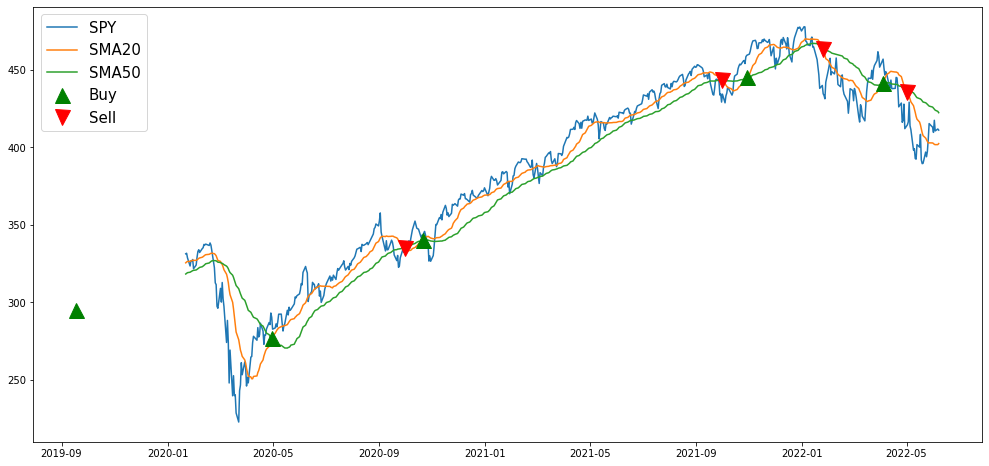

In [33]:
# taking last 600 trading days
SMA20 = spy['Close'].rolling(window=20).mean()
SMA50 = spy['Close'].rolling(window=50).mean()
plt.figure(figsize=(17, 8))
plt.plot(spy['Close'][-600:], label='SPY')
plt.plot(SMA20[-600:], label='SMA20')
plt.plot(SMA50[-600:], label='SMA50')
plt.plot(crossovers.loc[crossovers.Signal == 'Buy']['Dates'][-5:], 
         crossovers['SMA20'][crossovers.Signal == 'Buy'][-5:],
        '^', markersize=15, color='g', label='Buy')
plt.plot(crossovers.loc[crossovers.Signal == 'Sell']['Dates'][-4:], 
         crossovers['SMA20'][crossovers.Signal == 'Sell'][-4:],
        'v', markersize=15, color='r', label='Sell')
plt.legend(loc='upper left', fontsize=15)

# Source:
https://towardsdatascience.com/algorithmic-trading-in-python-simple-moving-averages-7498245b10b